In [59]:
# Manipulations standard
import geopandas as gpd
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# Pour la basemap
import contextily as cx
# Autres
import os
# Potentiel solaire package
from potentiel_solaire.constants import DATA_FOLDER

# Etape 1: Ouverture des datasets

## Dataset : départements

C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\2162312035.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\2162312035.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


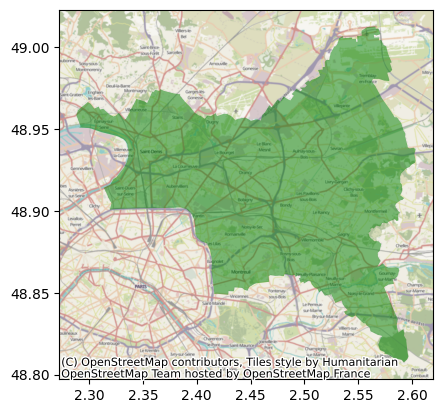

In [60]:
dpts = gpd.read_file(DATA_FOLDER / "contour-des-departements.geojson").to_crs(4326)
ShapeNT = dpts[dpts.code == "93"].geometry
fig, ax = plt.subplots()
dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Dataset : annuaire éducation / écoles

In [61]:
# Takes 58s on my laptop
annuaire = gpd.read_file(DATA_FOLDER / 'fr-en-annuaire-education.geojson')
print(len(annuaire),"items")
annuaire = annuaire[annuaire.code_postal.str.startswith("93")]
print(len(annuaire),"objets dans le 93")
annuaire = annuaire.to_crs(4326)
annuaire.head(3)

69641 items
1432 objets dans le 93


identifiant_de_l_etablissement  \
60                       0931458E   
61                       0932071W   
62                       0932922W   

                                    nom_etablissement type_etablissement  \
60                     Ecole maternelle Les Perrières              Ecole   
61                   Ecole maternelle Françoise Dolto              Ecole   
62  Ecole Primaire Privée des Découvertes de Montf...              Ecole   

   statut_public_prive               adresse_1 adresse_2  \
60              Public    15 rue du Capricorne      None   
61              Public    4 rue Charles Conrad      None   
62               Privé  6 impasse des Gazelles      None   

                 adresse_3 code_postal code_commune       nom_commune  ...  \
60  93600 AULNAY SOUS BOIS       93600        93005  Aulnay-sous-Bois  ...   
61            93270 SEVRAN       93270        93071            Sevran  ...   
62       93370 MONTFERMEIL       93370        93047       Montfermeil  ...   

   code_type_contrat_prive  pial etablissement_mere  \
60                      99  None               None   
61                      99  None               None   
62                      10  None               None   

    type_rattachement_etablissement_mere  code_circonscription  \
60                                  None              0931042C   
61                                  None              0931041B   
62                                  None              0932218F   

   code_zone_animation_pedagogique libelle_zone_animation_pedagogique  \
60                            None                               None   
61                            None                               None   
62                            None                               None   

   code_bassin_formation libelle_bassin_formation                  geometry  
60                  None                     None  POINT (2.50458 48.95615)  
61                  None                     None  POINT (2.52386 48.94787)  
62                  None                     None  POINT (2.56402 48.90239)  

[3 rows x 73 columns]

## Dataset : BD TOPO

In [62]:
import fiona

Vérifions quelles sont les layers de dispo dans le gpkg

In [63]:
GPKG = DATA_FOLDER / "BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg"
layers = fiona.listlayers(GPKG)
print(" ".join(layers))

troncon_de_route route_numerotee_ou_nommee itineraire_autre troncon_de_voie_ferree equipement_de_transport piste_d_aerodrome aerodrome point_de_repere non_communication point_du_reseau voie_ferree_nommee toponymie_transport batiment cimetiere construction_lineaire construction_ponctuelle construction_surfacique reservoir ligne_orographique pylone terrain_de_sport toponymie_bati cours_d_eau troncon_hydrographique bassin_versant_topographique plan_d_eau surface_hydrographique noeud_hydrographique detail_hydrographique toponymie_hydrographie zone_d_habitation lieu_dit_non_habite detail_orographique toponymie_lieux_nommes canalisation ligne_electrique poste_de_transformation erp zone_d_activite_ou_d_interet toponymie_services_et_activites voie_nommee parc_ou_reserve foret_publique toponymie_zones_reglementees haie zone_de_vegetation arrondissement arrondissement_municipal commune epci collectivite_territoriale departement region adresse_ban batiment_rnb_lien_bdtopo lien_adresse_vers_bdtopo

Et on les display

In [64]:
bats = gpd.read_file(GPKG, layer="batiment")# toponymie_services_et_activites
bats = bats.to_crs(4326) 

In [65]:
bats.columns

Index(['cleabs', 'nature', 'usage_1', 'usage_2', 'construction_legere',
       'etat_de_l_objet', 'date_creation', 'date_modification',
       'date_d_apparition', 'date_de_confirmation', 'sources',
       'identifiants_sources', 'methode_d_acquisition_planimetrique',
       'methode_d_acquisition_altimetrique', 'precision_planimetrique',
       'precision_altimetrique', 'nombre_de_logements', 'nombre_d_etages',
       'materiaux_des_murs', 'materiaux_de_la_toiture', 'hauteur',
       'altitude_minimale_sol', 'altitude_minimale_toit',
       'altitude_maximale_toit', 'altitude_maximale_sol',
       'origine_du_batiment', 'appariement_fichiers_fonciers',
       'identifiants_rnb', 'geometry'],
      dtype='object')

13348 items
1385 items dans la zone


C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\2806925089.py:12: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\2806925089.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


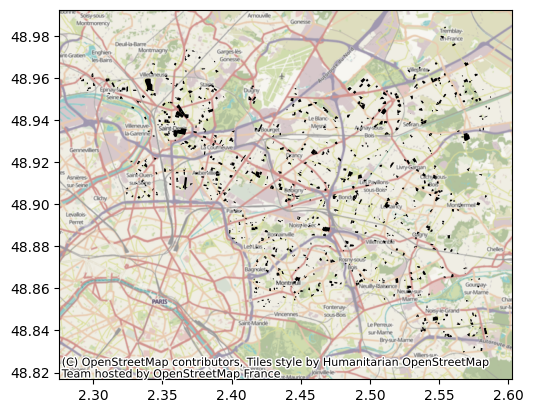

In [66]:
# Takes 10s on my laptop
bdedu = gpd.read_file(GPKG, layer="zone_d_activite_ou_d_interet")# toponymie_services_et_activites
print(len(bdedu),"items")
# Utilisons les memes projections
bdedu = bdedu.to_crs(4326) 
# Tri sur la catégorie d'intéret
bdedu = bdedu[bdedu["categorie"] == "Science et enseignement"] 
bdedu = gpd.sjoin(bdedu, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdedu),"items dans la zone")

fig, ax = plt.subplots()
bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()


In [67]:
bat_edu = gpd.sjoin(gpd.GeoDataFrame(bats[["cleabs","geometry","identifiants_rnb","materiaux_de_la_toiture","hauteur"]],geometry="geometry"), gpd.GeoDataFrame(bdedu[["cleabs","toponyme","geometry"]],geometry="geometry"), how='left').dropna(subset="toponyme")
bat_edu.head(3)

cleabs_left  \
1699  BATIMENT0000000002599800   
1771  BATIMENT0000000002600955   
1772  BATIMENT0000000002600963   

                                               geometry  \
1699  MULTIPOLYGON Z (((2.55395 48.98409 82.5, 2.553...   
1771  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.3772 ...   
1772  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.37734...   

               identifiants_rnb materiaux_de_la_toiture  hauteur  index_right  \
1699  A12MR4AER8XA/H3V9FEZVTCQH                    None      7.9       8101.0   
1771               GMKNQX3Q3AY4                    None     11.4       9799.0   
1772               FWK5CQ31Y968                             11.3       9799.0   

                  cleabs_right                         toponyme  
1699  SURFACTI0000000002555409  I.M.E. B. Guillez le Petit Orme  
1771  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin  
1772  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin

On peut aussi afficher les réseaux

c:\Users\Wouaff\13_potentiel_solaire\algorithme\.venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'character varying' not supported
  return ogr_read(
c:\Users\Wouaff\13_potentiel_solaire\algorithme\.venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'character varying(256)' not supported
  return ogr_read(
c:\Users\Wouaff\13_potentiel_solaire\algorithme\.venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'character varying(30)' not supported
  return ogr_read(
c:\Users\Wouaff\13_potentiel_solaire\algorithme\.venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Field format 'timestamp with time zone' not supported
  return ogr_read(
c:\Users\Wouaff\13_potentiel_solaire\algorithme\.venv\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg': 'troncon_de_route' (default), 'route_numerotee_ou_nommee', 'itineraire_autre', 'troncon_de_voie_ferree

188015 items
68497 items


C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\1883887287.py:9: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\1883887287.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


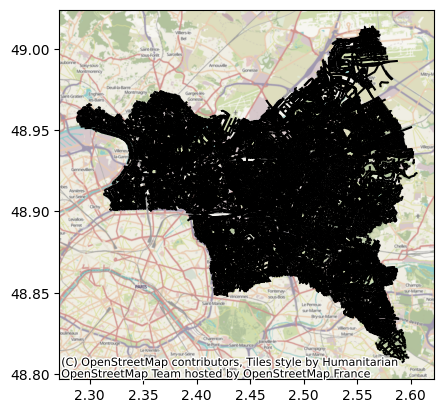

In [68]:
# Takes 80s on my laptop -- loading roads in this case
bdtopo = gpd.read_file(GPKG)
print(len(bdtopo),"items")
# Utilisons les memes projections
bdtopo = bdtopo.to_crs(4326)
bdtopo = gpd.sjoin(bdtopo, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdtopo),"items")
fig, ax = plt.subplots()
bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Dataset: parcellaire-express

In [69]:
# Takes 11s on my laptop
pci = gpd.read_file(DATA_FOLDER / "PARCELLAIRE-EXPRESS_1-1__SHP_LAMB93_D093_2024-10-01/PARCELLAIRE-EXPRESS/1_DONNEES_LIVRAISON_2024-11-00210/PEPCI_1-1_SHP_LAMB93_D093/BATIMENT.SHP")
print(len(pci),"items")
pci = pci.to_crs(4326)
pci = gpd.sjoin(pci, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(pci),"items - sorted")
pci.head(3)

376574 items
376220 items - sorted


TYPE                                           geometry  \
0  Construction légère  POLYGON ((2.39066 48.90535, 2.3907 48.90536, 2...   
1      Bâtiment en dur  POLYGON ((2.52665 48.87779, 2.52669 48.87777, ...   
2      Bâtiment en dur  POLYGON ((2.52583 48.87706, 2.52582 48.87706, ...   

   index_right code                nom  
0         93.0   93  Seine-Saint-Denis  
1         93.0   93  Seine-Saint-Denis  
2         93.0   93  Seine-Saint-Denis

# Etape 2: Exploration autour d'une école

## Etablissement d'une zone d'intérêt

In [70]:
pd.DataFrame(annuaire.iloc[0])

60
identifiant_de_l_etablissement                                           0931458E
nom_etablissement                                  Ecole maternelle Les Perrières
type_etablissement                                                          Ecole
statut_public_prive                                                        Public
adresse_1                                                    15 rue du Capricorne
...                                                                           ...
code_zone_animation_pedagogique                                              None
libelle_zone_animation_pedagogique                                           None
code_bassin_formation                                                        None
libelle_bassin_formation                                                     None
geometry                            POINT (2.5045845086808955 48.956145824997634)

[73 rows x 1 columns]

In [71]:
# Filtrons autour de d = 100m
d = 0.02 # échelle à retrouver
zone = annuaire.iloc[0].geometry.buffer(d)

## Clip des dataset pour rester léger

In [72]:
bdtopo_d = bdtopo[bdtopo.geometry.within(zone)].clip(zone)# check with within
pci_d = pci[pci.geometry.within(zone)].clip(zone)# check with within
bdedu_d = bdedu[bdedu.geometry.within(zone)].clip(zone)# check with within
bat_edu_d =  bat_edu[bat_edu.geometry.within(zone)].clip(zone)

C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3993707997.py:6: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3993707997.py:7: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")


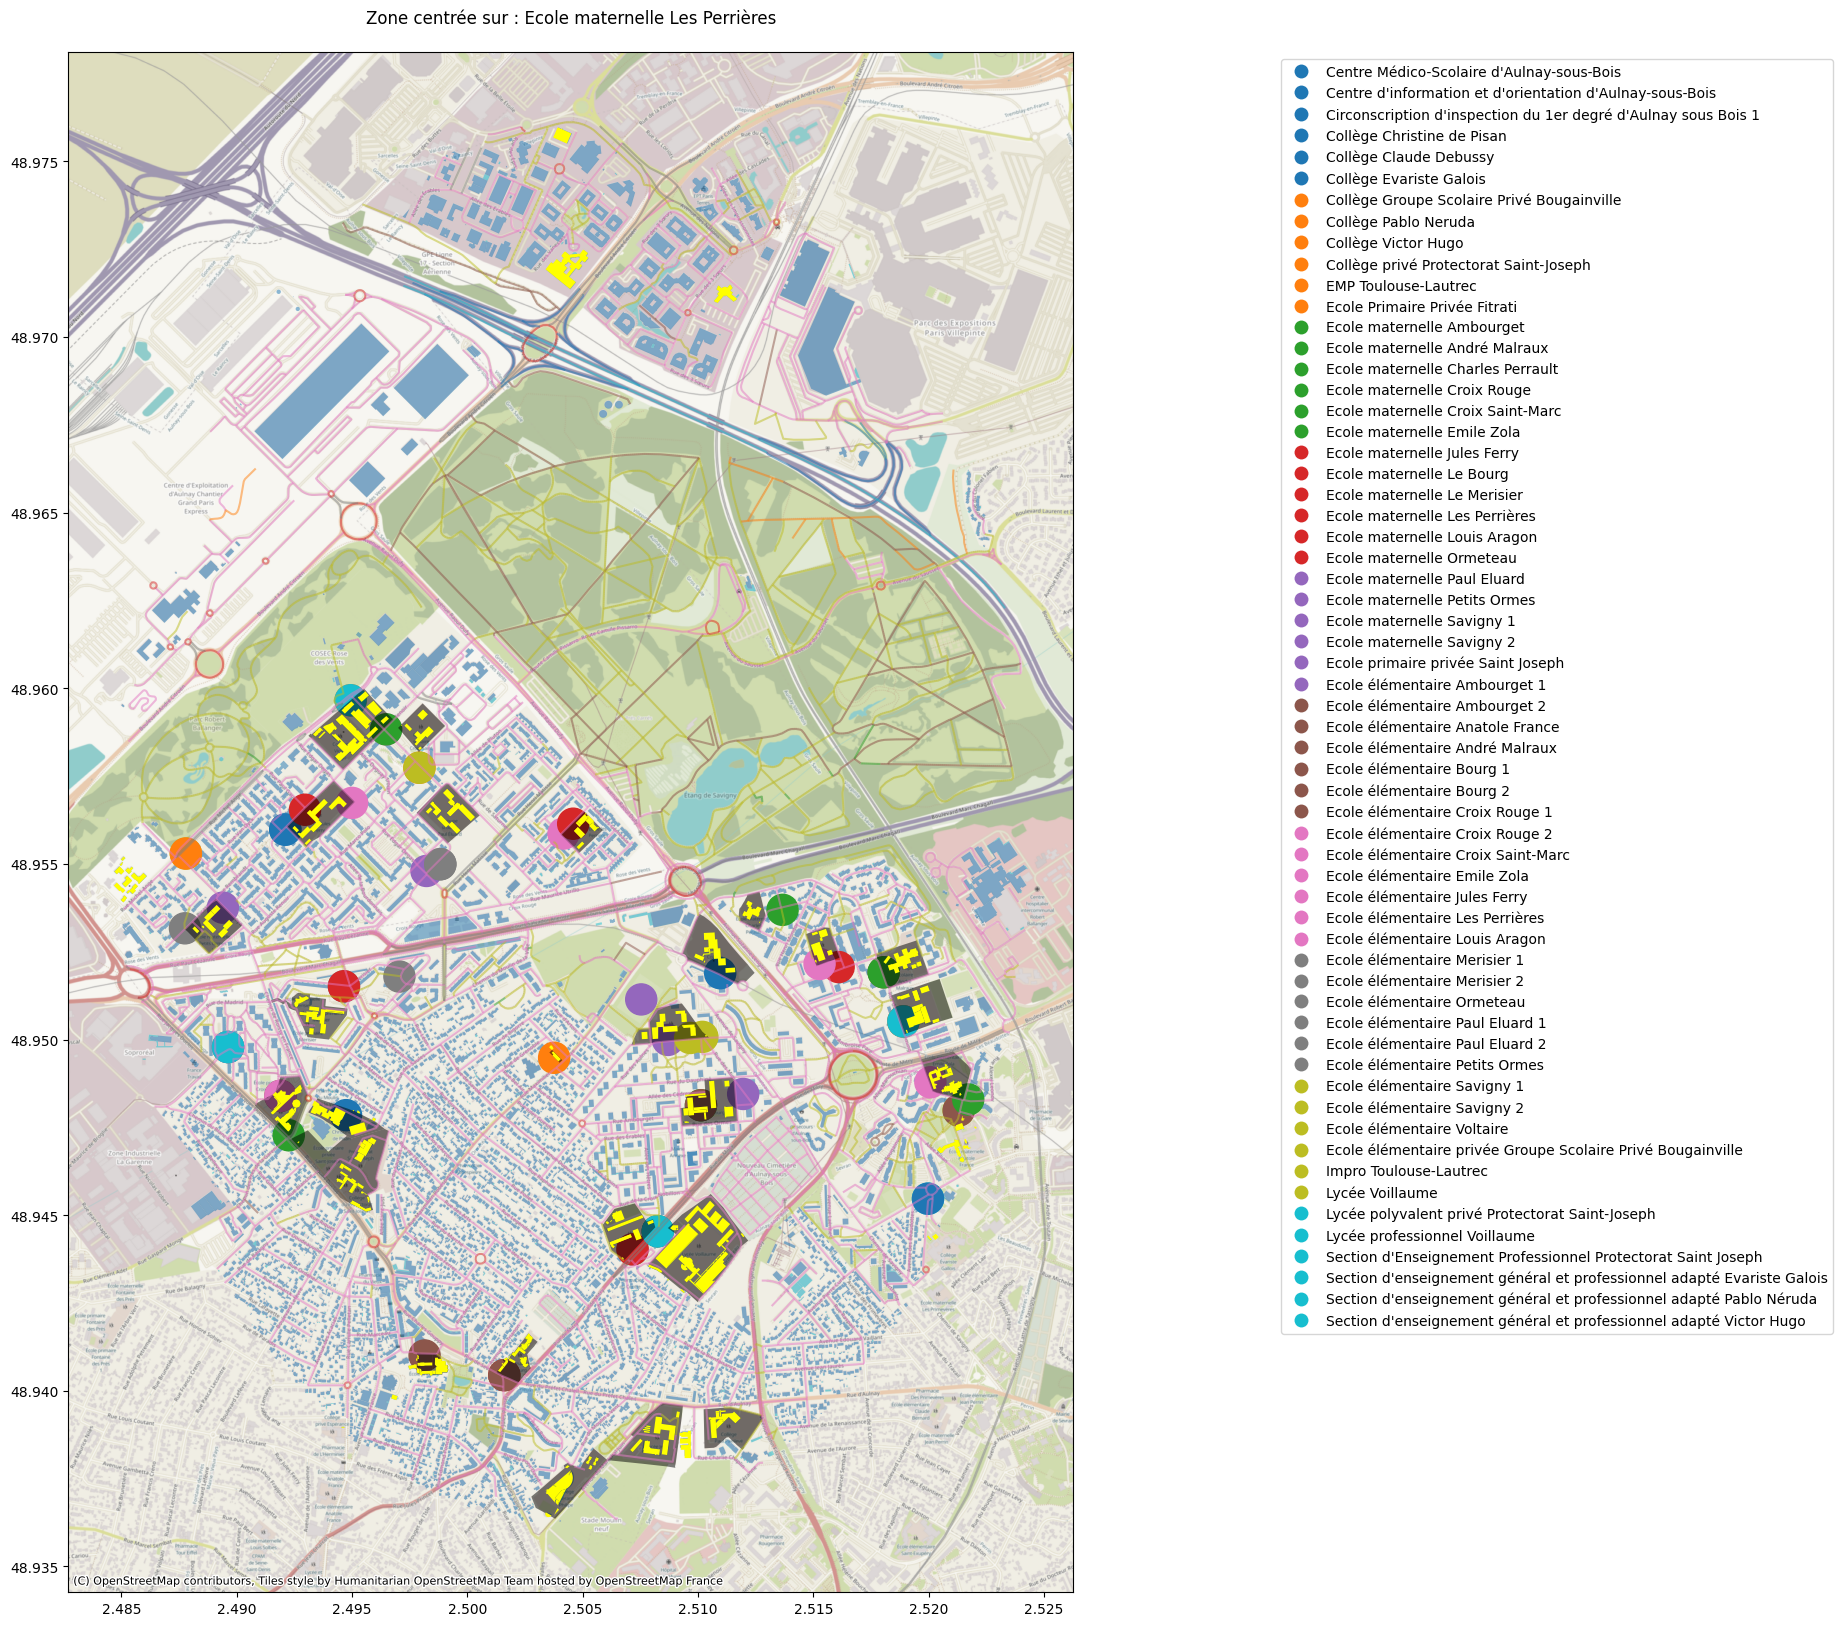

<Figure size 640x480 with 0 Axes>

In [73]:
#plots all dans la zone sélectionnée
fig, ax = plt.subplots(figsize=(20,20))
pci_d.plot(column="TYPE", legend=True, categorical = True, ax = ax, alpha=0.5)
bdtopo_d.plot(column="nature",legend=True, categorical = True, ax = ax, alpha=0.5)
annuaire[annuaire.geometry.within(zone)].clip(zone).plot(column = "nom_etablissement",legend=True, categorical = True, ax = ax, markersize=500, legend_kwds={'loc': 'upper left'})
bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")
cx.add_basemap(ax, crs=pci_d.crs, zoom=16) # source=cx.providers.OpenStreetMap.Mapnik,
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 0, 0, 1))
ax.set_title("Zone centrée sur : "+annuaire.iloc[0].nom_etablissement+"\n")
plt.show()
plt.savefig("preview_example.jpg")

# Etape 3: Travail au niveau d'une école spécifique

In [74]:
from shapely.ops import nearest_points

## Sélection de l'école et clip des datasets

In [75]:
# On s'intéresse à : bdedu_d, bat_edu_d
ecoles = annuaire[annuaire.geometry.within(zone)]
ecoles.head(3)

identifiant_de_l_etablissement               nom_etablissement  \
60                         0931458E  Ecole maternelle Les Perrières   
8924                       0930739Y       Ecole élémentaire Bourg 2   
8928                       0930771H       Ecole maternelle Le Bourg   

     type_etablissement statut_public_prive             adresse_1 adresse_2  \
60                Ecole              Public  15 rue du Capricorne      None   
8924              Ecole              Public      39 rue de Sevran      None   
8928              Ecole              Public      39 rue de Sevran      None   

                   adresse_3 code_postal code_commune       nom_commune  ...  \
60    93600 AULNAY SOUS BOIS       93600        93005  Aulnay-sous-Bois  ...   
8924  93600 AULNAY SOUS BOIS       93600        93005  Aulnay-sous-Bois  ...   
8928  93600 AULNAY SOUS BOIS       93600        93005  Aulnay-sous-Bois  ...   

     code_type_contrat_prive  pial etablissement_mere  \
60                        99  None               None   
8924                      99  None               None   
8928                      99  None               None   

      type_rattachement_etablissement_mere  code_circonscription  \
60                                    None              0931042C   
8924                                  None              0931051M   
8928                                  None              0931051M   

     code_zone_animation_pedagogique libelle_zone_animation_pedagogique  \
60                              None                               None   
8924                            None                               None   
8928                            None                               None   

     code_bassin_formation libelle_bassin_formation                  geometry  
60                    None                     None  POINT (2.50458 48.95615)  
8924                  None                     None   POINT (2.5016 48.94045)  
8928                  None                     None   POINT (2.5016 48.94045)  

[3 rows x 73 columns]

In [76]:
recollement = gpd.sjoin_nearest(ecoles, bdedu_d, distance_col="distances", lsuffix="e_", rsuffix="f_", exclusive=True)[["identifiant_de_l_etablissement","nom_etablissement","distances","toponyme","cleabs","nature","nature_detaillee"]]
recollement.head(3)

c:\Users\Wouaff\13_potentiel_solaire\algorithme\.venv\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


identifiant_de_l_etablissement               nom_etablissement  \
60                         0931458E  Ecole maternelle Les Perrières   
8924                       0930739Y       Ecole élémentaire Bourg 2   
8928                       0930771H       Ecole maternelle Le Bourg   

      distances                           toponyme                    cleabs  \
60          0.0      Groupe Scolaire les Perrières  SURFACTI0000000002555464   
8924        0.0  Groupe Scolaire Comtesse de Ségur  SURFACTI0000000002555580   
8928        0.0  Groupe Scolaire Comtesse de Ségur  SURFACTI0000000002555580   

                     nature nature_detaillee  
60    Enseignement primaire  Groupe scolaire  
8924  Enseignement primaire  Groupe scolaire  
8928  Enseignement primaire  Groupe scolaire

Et on essaye de bien vérifier que les écoles identifiées soient celles des zones identifiées, pour ca on vérifie la distance entre les écoles et les zones

Et on retire les matchs où la distance entre les deux points est trop grande

0.00032788006711666976


<Axes: >

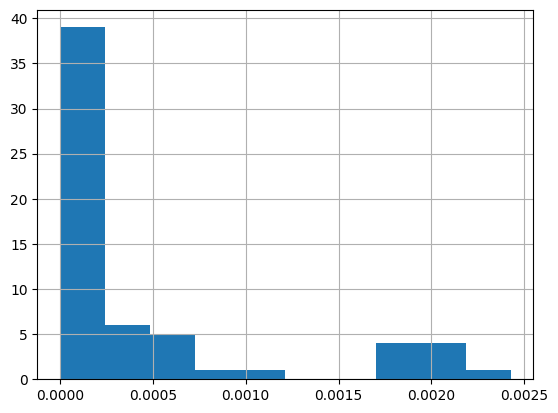

In [77]:
seuil_recol = recollement.distances.quantile(q=0.7)
print(seuil_recol)
recollement.distances.hist()

In [78]:
recollement = recollement[recollement.distances < seuil_recol]
bdedu_areas = recollement.toponyme.unique()
bdedu_r = bdedu[bdedu.toponyme.isin(bdedu_areas)]
recollement.head(3)

identifiant_de_l_etablissement               nom_etablissement  \
60                         0931458E  Ecole maternelle Les Perrières   
8924                       0930739Y       Ecole élémentaire Bourg 2   
8928                       0930771H       Ecole maternelle Le Bourg   

      distances                           toponyme                    cleabs  \
60          0.0      Groupe Scolaire les Perrières  SURFACTI0000000002555464   
8924        0.0  Groupe Scolaire Comtesse de Ségur  SURFACTI0000000002555580   
8928        0.0  Groupe Scolaire Comtesse de Ségur  SURFACTI0000000002555580   

                     nature nature_detaillee  
60    Enseignement primaire  Groupe scolaire  
8924  Enseignement primaire  Groupe scolaire  
8928  Enseignement primaire  Groupe scolaire

## Création d'une liste école par école au sein de la zone définie à l'étape 2

C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\564879362.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)


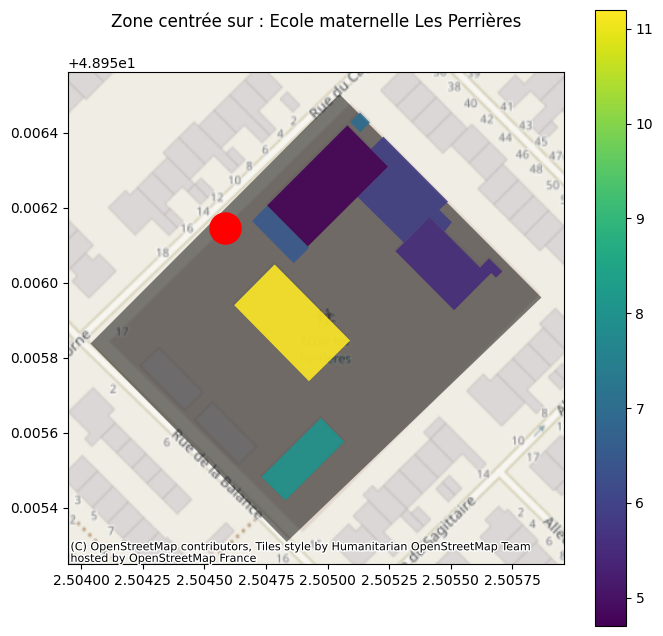

In [79]:
documentation = "# Example de liste d'écoles\n\n"

fullRun = False # Set true to to all all schools
if fullRun :
    ecoles_to_run = recollement["identifiant_de_l_etablissement"].unique()
else:
    ecoles_to_run = [recollement["identifiant_de_l_etablissement"].unique()[0]]
for id_ecole in ecoles_to_run:

    ecole = ecoles[ecoles.identifiant_de_l_etablissement == id_ecole]
    documentation +="## "+ecole.iloc[0]["nom_etablissement"]+"\n\n" + \
        "* Type etablissement: "+ecole.iloc[0]["type_etablissement"] +"\n"+ \
        "* adresse_1: "+ecole.iloc[0]["adresse_1"] +"\n"+ \
        "* nom_commune: "+ecole.iloc[0]["nom_commune"] +"\n"+ \
        "* identifiant_de_l_etablissement: "+ecole.iloc[0]["identifiant_de_l_etablissement"] +"\n"
    match = recollement[recollement.identifiant_de_l_etablissement == id_ecole]
    zone = ecole.iloc[0].geometry.buffer(0.01)
    bdedu_s = bdedu[bdedu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s = bat_edu[bat_edu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)
    geod = bat_edu_s.crs.get_geod()
    bat_edu_s["area_m2"] = bat_edu_s.geometry.apply(lambda g: abs(geod.geometry_area_perimeter(g)[0]))
    documentation += "* Surface totale: "+str(int(bat_edu_s.area_m2.sum())) +"m2\n\n"
    if os.path.isfile("images/"+id_ecole+".jpg"):
        pass
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
        bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
        ecole.plot(color="red", ax = ax, markersize=500)
        cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
        ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
        plt.savefig("images/"+id_ecole+".jpg")

    documentation += "### Image\n\n![]("+ecole.iloc[0]["identifiant_de_l_etablissement"]+".jpg)\n\n"
if not fullRun:
    fig, ax = plt.subplots(figsize=(8,8))
    bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
    bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
    ecole.plot(color="red", ax = ax, markersize=500)
    cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
    ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
else:
    with open("images/Readme.md", "w") as f:
        f.write(documentation)

# Etape 3: Intégration pour le d93 une source de donnée 'potentiel solaire"

* Provenance: https://data-iau-idf.opendata.arcgis.com/datasets/iau-idf::le-potentiel-solaire-des-toitures/

##  Préparation de la requete


On définit le périmètre de la zone d'intérêt avant d'aller demander les data

In [80]:
dfecole = pd.concat([bdedu_s,bat_edu_s,ecole])
gdf = gpd.GeoDataFrame(dfecole,geometry="geometry")
geo = ",".join([str(x) for x in gdf.total_bounds])
geo


'2.5040371413954103,48.95530870911575,2.50586849421132,48.956502906142006'

On prend les données des batiments qui sont dans la box

In [81]:
import requests

requete_type = "https://geoweb.iau-idf.fr/agsmap1/rest/services/OPENDATA/OpendataIAU4/MapServer/26/query?where=1%3D1&outFields=*&geometry="+geo+"&geometryType=esriGeometryEnvelope&inSR=4326&spatialRel=esriSpatialRelIntersects&outSR=4326&f=json"

response = requests.get(requete_type) 


In [82]:
potentiel_batiment = pd.DataFrame([x["attributes"] for x in response.json()["features"]])
potentiel_batiment = potentiel_batiment[potentiel_batiment.id.isin(bat_edu_s.cleabs_left)]
bat_edu_p = bat_edu_s.merge(potentiel_batiment,how="left", left_on="cleabs_left", right_on="id")
bat_edu_p.head(3)

cleabs_left  \
0  BATIMENT0000000245509996   
1  BATIMENT0000000245509978   
2  BATIMENT0000000245510030   

                                            geometry identifiants_rnb  \
0  POLYGON Z ((2.50483 48.95542 63.1, 2.50473 48....     8ARS7YBADQVJ   
1  POLYGON Z ((2.50492 48.95574 67.4, 2.50462 48....     81CKEE588QM5   
2  POLYGON Z ((2.50562 48.95604 60.8, 2.50566 48....     9WWNA4S14H32   

  materiaux_de_la_toiture  hauteur  index_right              cleabs_right  \
0                    None      8.0      10651.0  SURFACTI0000000002555464   
1                    None     11.2      10651.0  SURFACTI0000000002555464   
2                      90      5.5      10651.0  SURFACTI0000000002555464   

                        toponyme     area_m2  objectid  ...  \
0  Groupe Scolaire les Perrières  246.251757  343833.0  ...   
1  Groupe Scolaire les Perrières  543.376673  343820.0  ...   
2  Groupe Scolaire les Perrières  373.360078  343857.0  ...   

                       systeme protection  mos2017    insee     moyenne2  \
0  thermique ou photovoltaïque        0.0     58.0  93005.0  1217.051880   
1  thermique ou photovoltaïque        0.0     58.0  93005.0  1214.834714   
2  thermique ou photovoltaïque        0.0     58.0  93005.0  1212.528602   

   forme    production mos17  st_area(shape)  st_length(shape)  
0  Npans  17429.156563  10.0         246.235         69.441665  
1   plat  48069.624721  10.0         543.340         97.727711  
2   plat  30576.891520  10.0         373.335         89.805234  

[3 rows x 27 columns]

## Visualisation

Text(0.5, 1.0, "Zone centrée sur : Ecole maternelle Les Perrières\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")

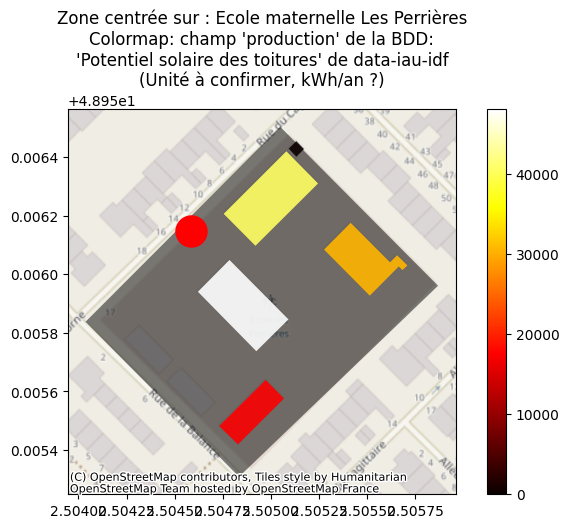

In [83]:
fig, ax = plt.subplots(figsize=(8,5))
bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_p.plot(column="production",legend=True, ax = ax, alpha=0.9,cmap="hot")
ecole.plot(color="red", ax = ax, markersize=500)
cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")

## Etape 4 : Ouverture de la db Gisement Solaire Brut au Bati 

In [ ]:
# Takes some time 

potentiel_solaire = gpd.read_file(DATA_FOLDER / "potentiel-gisement-solaire-brut-au-bati.geojson").to_crs(4326)

In [ ]:
potentiel_solaire.columns

Index(['geo_point_2d', 'geo_shape', 'objectid', 'n_sq_eb', 'n_sq_eb_or',
       'c_cainsee', 'm2_e_in700', 'm2_e_70_80', 'm2_e_80_90', 'm2_e_90_10',
       'm2_e_s1000', 'm2_e_tot', 'c_ens_moy', 'shape_leng', 'shape_area',
       'geometry'],
      dtype='object')

Number of buildings with missing solar data:
0


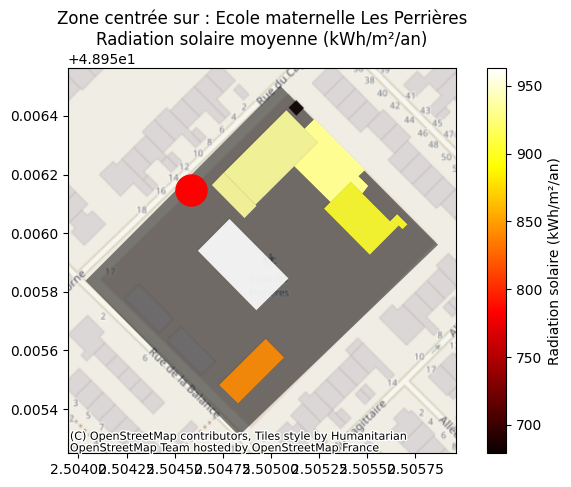

In [ ]:
# Reset indices and ensure CRS match
bat_edu_s = bat_edu_s.reset_index(drop=True)
potentiel_solaire = potentiel_solaire.reset_index(drop=True)
bat_edu_s = bat_edu_s.to_crs(potentiel_solaire.crs)

# Perform spatial join with explicit suffixes
school_solar = gpd.sjoin(
    bat_edu_s, 
    potentiel_solaire, 
    how="left", 
    predicate="intersects",
    lsuffix='_left',
    rsuffix='_right'
)

print("Number of buildings with missing solar data:")
print(school_solar['c_ens_moy'].isna().sum())

fig, ax = plt.subplots(figsize=(8,5))
bdedu_s.plot(legend=True, categorical=True, ax=ax, color="black", alpha=0.5)

school_solar.plot(
    column="c_ens_moy",  # average solar radiation
    legend=True, 
    ax=ax, 
    alpha=0.9,
    cmap="hot",
    legend_kwds={'label': 'Radiation solaire (kWh/m²/an)'}
)

ecole.plot(color="red", ax=ax, markersize=500)
cx.add_basemap(ax, crs=pci_d.crs, zoom=18)
ax.set_title("Zone centrée sur : " + ecole.iloc[0].nom_etablissement + 
             "\nRadiation solaire moyenne (kWh/m²/an)")

plt.show()

## Impression des autres métriques de la db potentiel solaire 2

Liste des attributs : https://geocatalogue.apur.org/catalogue/srv/fre/catalog.search#/metadata/urn:apur:potentiel_gisement_solaire_brut_au_bati

In [ ]:
# the specific school's data
school_data = school_solar.iloc[0]

print("Solar Potential Analysis for:", ecole.iloc[0].nom_etablissement)
print("-" * 50)

# building information
print("\nBuilding Surface Areas:")
print(f"Total roof surface: {school_data['m2_e_tot']:.0f} m²")
print("\nBreakdown by solar radiation level:")
print(f"- Excellent (>1000 kWh/m²/year): {school_data['m2_e_s1000']:.0f} m²")
print(f"- Very Good (900-1000 kWh/m²/year): {school_data['m2_e_90_10']:.0f} m²")
print(f"- Good (800-900 kWh/m²/year): {school_data['m2_e_80_90']:.0f} m²")
print(f"- Moderate (700-800 kWh/m²/year): {school_data['m2_e_70_80']:.0f} m²")
print(f"- Limited (<700 kWh/m²/year): {school_data['m2_e_in700']:.0f} m²")

print("\nAverage Solar Radiation:")
print(f"Mean radiation: {school_data['c_ens_moy']:.0f} kWh/m²/year")

# geometric information
print("\nGeometric Information:")
print(f"Building perimeter: {school_data['shape_leng']:.0f} meters")
print(f"Building footprint area: {school_data['shape_area']:.0f} m²")

# location information
print("\nLocation Information:")
print(f"Municipality code: {school_data['c_cainsee']:.0f}")
print(f"Building ID: {school_data['n_sq_eb']:.0f}")
print(f"Original Building ID: {school_data['n_sq_eb_or']:.0f}")

# calculate a metric
# TODO: This is not exhaustive, maybe we can also take into account very good and good radiations levels ?
if school_data['m2_e_tot'] > 0:
    optimal_percentage = (school_data['m2_e_s1000'] / school_data['m2_e_tot']) * 100
    print("\nDerived Metrics:")
    print(f"Percentage of optimal solar surface: {optimal_percentage:.1f}%")

Solar Potential Analysis for: Ecole maternelle Les Perrières
--------------------------------------------------

Building Surface Areas:
Total roof surface: 246 m²

Breakdown by solar radiation level:
- Excellent (>1000 kWh/m²/year): 6 m²
- Very Good (900-1000 kWh/m²/year): 121 m²
- Good (800-900 kWh/m²/year): 56 m²
- Moderate (700-800 kWh/m²/year): 25 m²
- Limited (<700 kWh/m²/year): 38 m²

Average Solar Radiation:
Mean radiation: 841 kWh/m²/year

Geometric Information:
Building perimeter: 70 meters
Building footprint area: 247 m²

Location Information:
Municipality code: 93005
Building ID: 930031617
Original Building ID: 930031617

Derived Metrics:
Percentage of optimal solar surface: 2.4%


## Etape 5 : Cartographie des ombres et impact sur l'énergie solaire

### Imports

Ajout folium, pvlib dans le package Poetry

In [ ]:
# -> J'ai remis les impots ici pour éviter de Run tout le fichier (qui prend du temps)

import pandas as pd 
import geopandas as gpd  
import matplotlib.pyplot as plt  
# Calculs mathématiques et trigonométriques
import numpy as np 
import contextily as ctx
# Création de cartes interactives 
import folium  
# Transformation géométrique (translation)
from shapely.affinity import translate  
# Calcul de la position du soleil
from pvlib.solarposition import get_solarposition  
# Conversion des objets géométriques
from shapely.geometry import mapping  
# Gestion des dates et heures
from datetime import datetime  
# Gestion des fuseaux horaires
import pytz  
#afficher la carte Folium dans Jupyter
from IPython.display import display




Choix des deux établissements : 

- Collège Paul Painlevé
- Collège Victor Hugo

C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3496243526.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  latitude = batiment_scolaire_wgs84.geometry.centroid.y.values[0]
C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3496243526.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitude = batiment_scolaire_wgs84.geometry.centroid.x.values[0]


Latitude: 48.939136, Longitude: 2.511008 pour Collège Paul Painlevé
12h - Azimut : 176.44° - Élévation : 26.60°
Longueur de l'ombre à 12h : 24.16 mètres


C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3496243526.py:62: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3496243526.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


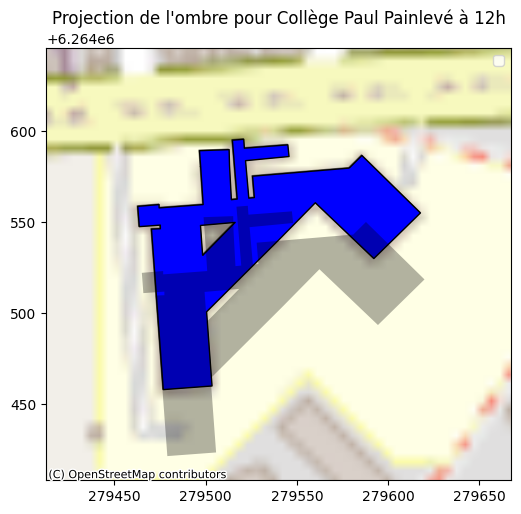

C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3496243526.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  latitude = batiment_scolaire_wgs84.geometry.centroid.y.values[0]
C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3496243526.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitude = batiment_scolaire_wgs84.geometry.centroid.x.values[0]


Latitude: 48.958883, Longitude: 2.495051 pour Collège Victor Hugo
12h - Azimut : 176.43° - Élévation : 26.58°
Longueur de l'ombre à 12h : 9.19 mètres


C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3496243526.py:62: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\Wouaff\AppData\Local\Temp\ipykernel_16724\3496243526.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


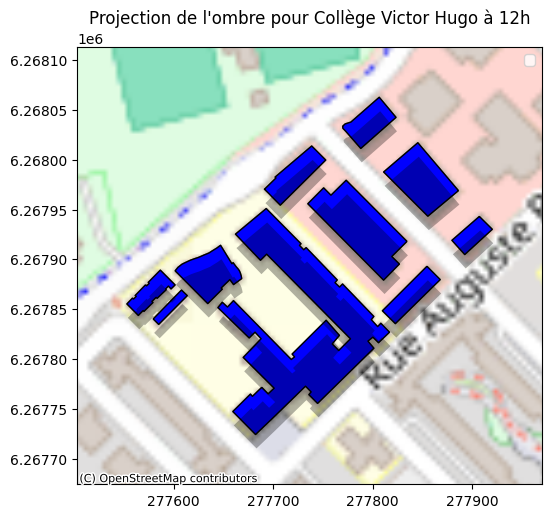

In [ ]:
def analyser_ombre_etablissement(nom_ecole, bat_edu_d, date_observation):
    batiment_scolaire = bat_edu_d[bat_edu_d["toponyme"].str.contains(nom_ecole, case=False, na=False)]
    if batiment_scolaire.empty:
        raise ValueError(f"Aucun bâtiment trouvé pour {nom_ecole}")

    # On fusionne si plusieurs polygones existent
    batiment_scolaire = batiment_scolaire.dissolve(by="toponyme")

    # WGS 84 pour obtenir la latitude/longitude correcte
    batiment_scolaire_wgs84 = batiment_scolaire.to_crs(epsg=4326)
    latitude = batiment_scolaire_wgs84.geometry.centroid.y.values[0]
    longitude = batiment_scolaire_wgs84.geometry.centroid.x.values[0]
    print(f"Latitude: {latitude:.6f}, Longitude: {longitude:.6f} pour {nom_ecole}")

    # position du soleil
    solpos = get_solarposition(date_observation, latitude, longitude)
    azimut_solaire = solpos["azimuth"].values[0]
    elevation_solaire = solpos["apparent_elevation"].values[0]

    print(f"{date_observation.hour}h - Azimut : {azimut_solaire:.2f}° - Élévation : {elevation_solaire:.2f}°")

    # si le soleil est levé 
    ombre_gdf = None
    if elevation_solaire > 0:
                            # Calcul de l'ombre projetée
        hauteur_batiment = batiment_scolaire.iloc[0]['hauteur']
        geom_batiment = batiment_scolaire.iloc[0]['geometry']
        longueur_ombre = hauteur_batiment / np.tan(np.radians(elevation_solaire))
        ombre_x = longueur_ombre * np.sin(np.radians(azimut_solaire))
        ombre_y = longueur_ombre * np.cos(np.radians(azimut_solaire))
        ombre = translate(geom_batiment, xoff=ombre_x, yoff=ombre_y)

                         # création du GeoDataFrame pour l'ombre
        ombre_gdf = gpd.GeoDataFrame(geometry=[ombre], crs="EPSG:2154")
        print(f"Longueur de l'ombre à {date_observation.hour}h : {longueur_ombre:.2f} mètres")
    else:
        print(f"{date_observation.hour}h - Le soleil est couché.")

    # cartographique
    bat_edu_d = bat_edu_d.to_crs(epsg=3857)
    batiment_scolaire = batiment_scolaire.to_crs(epsg=3857)
    if ombre_gdf is not None:
        ombre_gdf = ombre_gdf.to_crs(epsg=3857)

    bounds = batiment_scolaire.total_bounds
    margin = 50
    x_min, y_min, x_max, y_max = bounds[0] - margin, bounds[1] - margin, bounds[2] + margin, bounds[3] + margin

    # OpenStreetMap 
    fig, ax = plt.subplots(figsize=(6,6))
    bat_edu_d.plot(ax=ax, color="grey", alpha=0.5, edgecolor="black", label="Bâtiments scolaires")
    batiment_scolaire.plot(ax=ax, color="blue", edgecolor="black", label="Bâtiment sélectionné")

    # ajout de l'ombre si le soleil -> levé
    if ombre_gdf is not None:
        ombre_gdf.plot(ax=ax, alpha=0.3, color="black", label=f"Ombre à {date_observation.hour}h")

    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    plt.title(f"Projection de l'ombre pour {nom_ecole} à {date_observation.hour}h")
    plt.legend()
    plt.show()

    # carte interactive avec Folium
    batiment_scolaire = batiment_scolaire.to_crs(epsg=4326)
    m = folium.Map(location=[latitude, longitude], zoom_start=17, tiles="OpenStreetMap")

    folium.GeoJson(mapping(batiment_scolaire.geometry.iloc[0]), name="Bâtiment sélectionné",
                   style_function=lambda x: {"color": "blue", "weight": 3}).add_to(m)

    if ombre_gdf is not None:
        ombre_gdf = ombre_gdf.to_crs(epsg=4326)
        folium.GeoJson(mapping(ombre_gdf.geometry.iloc[0]), name=f"Ombre à {date_observation.hour}h",
                       style_function=lambda x: {"color": "black", "opacity": 0.5, "weight": 2}).add_to(m)

    folium.LayerControl().add_to(m)
    display(m)


bat_edu_d = bat_edu_d.to_crs(epsg=2154)

   # heure d’analyse 
heure = 12
date_observation = datetime(2024, 2, 10, heure, 0, tzinfo=pytz.timezone('Europe/Paris'))

analyser_ombre_etablissement("Collège Paul Painlevé", bat_edu_d, date_observation)
analyser_ombre_etablissement("Collège Victor Hugo", bat_edu_d, date_observation)